In [17]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from metpy.units import units
from metpy.calc import wind_components
import metpy.plots
from metpy.plots import SkewT
import _strptime

In [25]:
################ Given scripts from Instructor ##################

def get_single_station_data(station, start_date):
    
    ## if end date is not provided, only grab the data from the start time
    
    start = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")
    web_path = f"https://mesonet.agron.iastate.edu/json/raob.py?station={station}&ts={start}"
    
    json_file = pd.read_json(web_path)
    normailed_json = pd.json_normalize(json_file['profiles'])
    sounding_data = pd.json_normalize(normailed_json['profile'][0],
                                      meta=['pres', 'hght', 'tmpc', 'dwpc', 'drct', 'sknt'])
    n_levels = len(sounding_data)
    meta_columns = ['station', 'valid']
    meta = pd.DataFrame(np.repeat(normailed_json[meta_columns].values, n_levels, axis=0),
                        columns=['station', 'valid'])
    merged_data = pd.concat([meta, sounding_data], axis=1)
    
    return add_station_lat_lon(merged_data)
    

def get_all_station_data(start_date, pressure_level=None):
    
        
    start = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")
    web_path = f"https://mesonet.agron.iastate.edu/json/raob.py?ts={start}"
    
    if pressure_level != None:
        
        web_path += f"&pressure={pressure_level}"
        
    json_file = pd.read_json(web_path)
    normailed_json = pd.json_normalize(json_file['profiles'])
    meta_columns = ['station', 'valid']

    station_data = []
    for i in range(len(normailed_json['profile'])):
                   
        sounding_data = pd.json_normalize(normailed_json['profile'][i],
                                      meta=['pres', 'hght', 'tmpc', 'dwpc', 'drct', 'sknt'])
        sounding_data['station'] = normailed_json['station'].iloc[i]
        sounding_data['valid'] = normailed_json['valid'].iloc[i]
        station_data.append(sounding_data)
    
    all_station_data = pd.concat(station_data)
    
    return add_station_lat_lon(all_station_data)

In [23]:
def sounding_plotter():
   
    """
    Generates a Skew-T log-P diagram for a user-selected station and time.

    Prompts the user to enter a date (YYYY-MM-DD), time (00:00 or 12:00 UTC), 
    and station ID. Retrieves vertical profiles of temperature, dew point, 
    pressure, and wind, and plots them on a Skew-T diagram with standard 
    thermodynamic lines and wind barbs.

    Parameters:
        None (inputs are collected via user prompts)

    Returns:
        None (displays the plot using matplotlib)
    """
    
    date=input("Choose date in format: yyyy-mm-dd")
    
    time=input("Choose 12:00 or 00:00")
    
    date_time=date+" "+time
    
    Time=datetime.datetime.strptime(date_time, "%Y-%m-%d %H:%M")
    
    station_test = get_all_station_data(Time, pressure_level=500)
    
    station_list=list(station_test["station"])
    
    print("Heres a list of stations to choose from:", station_list)
    
    station=input("Choose station")
    
    stat = get_single_station_data(station, Time)
   
    h = stat['hght'].values
   
    p = stat['pres'].values*units.hPa
   
    T = stat['tmpc'].values*units.degC
    
    Td = stat['dwpc'].values*units.degC
   
    u, v = wind_components(stat['sknt'].values * units("knots"), stat['drct'].values * units("deg"))

    fig = plt.figure(figsize=(10, 7))
    
    skw = metpy.plots.SkewT(fig)
    
    skw.plot(p, T, color='r')
    
    skw.plot(p, Td, color='g')
   
    skw.plot_barbs(p[::10], u[::10], v[::10])    #sparse wind barbs
    
    skw.plot_dry_adiabats(linewidth=0.5)    #adding more elements that are usually seen
    
    skw.plot_moist_adiabats(linewidth=0.5)
    
    skw.plot_mixing_lines(linewidth=0.5)
    
    skw.ax.set_title(f'{station} SkewT Plot at {time} Z on {date}')
    
    skw.ax.set_xlabel('Temperature (°C)')
    
    skw.ax.set_ylabel('Pressure (hPa)')
   
    plt.show()

Choose date in format: yyyy-mm-dd 2025-04-06
Choose 12:00 or 00:00 12:00


Heres a list of stations to choose from: ['CWMJ', 'CWPL', 'CWQI', 'CWSE', 'CYAH', 'CYBK', 'CYCB', 'CYEU', 'CYEV', 'CYJT', 'CYLT', 'CYPH', 'CYQD', 'CYRB', 'CYSM', 'CYUX', 'CYVP', 'CYVQ', 'CYXY', 'CYYE', 'CYYQ', 'CYYR', 'CYZT', 'CYZV', 'CZXS', 'KABQ', 'KAMA', 'KAPX', 'KBIS', 'KBMX', 'KBOI', 'KBRO', 'KBUF', 'KCAR', 'KCHS', 'KCRP', 'KDDC', 'KDRT', 'KDTX', 'KDVN', 'KEPZ', 'KFFC', 'KFGZ', 'KFWD', 'KGGW', 'KGSO', 'KGYX', 'KIAD', 'KIAG', 'KILN', 'KILX', 'KINL', 'KJAN', 'KJAX', 'KLBF', 'KLCH', 'KLKN', 'KLZK', 'KMAF', 'KMFL', 'KMFR', 'KMHX', 'KMIA', 'KMPX', 'KNGP', 'KNIP', 'KNKX', 'KNQX', 'KOAK', 'KOKX', 'KOTX', 'KOUN', 'KPIT', 'KREV', 'KRNK', 'KSGF', 'KSHV', 'KSIL', 'KSLC', 'KSLE', 'KTBW', 'KTFX', 'KTOP', 'KTUS', 'KUIL', 'KVBG', 'KVEF', 'KWAL', 'KXMR', 'MDSD', 'MMAN', 'MMGM', 'MMLP', 'MMMX', 'MMMZ', 'MMUN', 'MMVR', 'PADQ', 'PAKN', 'PANC', 'PANN', 'PASN', 'PBET', 'PBRW', 'PFAI', 'PHLI', 'PITO', 'PMCG', 'POME', 'PYAK', 'TBPB', 'TJSJ', 'TXKF']


Choose station KIAG


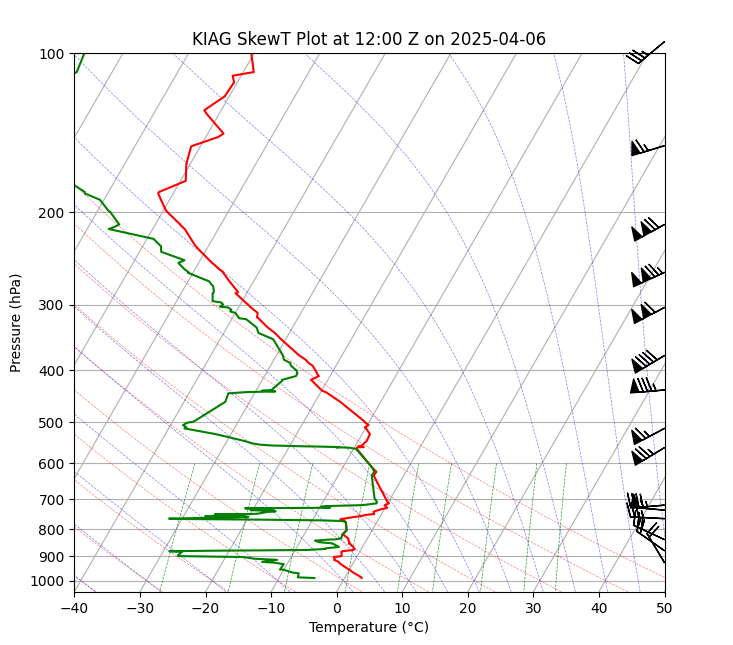

In [26]:
sounding_plotter()